# Prédiction de séries temporelles avec un Réseau de Neurones Récurent (RNN)

**Introduction:**


> Ce notebook démontre comment effectuer une prédiction de séries temporelles à l'aide d'un Réseau de Neurones Récurent (RNN) dans Google Colab. Le jeu de données utilisé concerne la consommation d'électricité en France de 2019 à 2022.


**Libraries Used:**

```
numpy : Une bibliothèque pour les opérations numériques en Python.
pandas : Une bibliothèque de manipulation de données.
matplotlib : Une bibliothèque de création de visualisations.
torch : PyTorch, une bibliothèque d'apprentissage en profondeur.
tensorflow : TensorFlow, une autre bibliothèque d'apprentissage en profondeur.
```


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:
# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Project Time series/Data/electricity-consumption-in-france-2019-2022.csv')

# Display the first 100 rows and column names
print(df.head(100))
print(df.columns)


                  date   Consomation eletric
0   2019-01-01 00:00:00                63028
1   2019-08-01 00:00:00                72241
2            01/15/2019                71740
3            01/22/2019                77543
4            01/29/2019                76566
..                  ...                  ...
95           10/23/2020                50929
96           10/30/2020                51925
97  2020-07-11 00:00:00                48610
98           11/14/2020                50459
99           11/21/2020                59020

[100 rows x 2 columns]
Index(['date ', 'Consomation eletric'], dtype='object')


In [6]:
# Convert 'date' column to datetime format
df['date '] = pd.to_datetime(df['date '], errors='coerce').combine_first(pd.to_datetime(df['date '], errors='coerce', format='%m/%d/%Y'))

# Data Preparation
df = df.sort_values(by='date ')  # Ensure the time series data is sorted by time
df = df.dropna()  # Drop any missing values

In [7]:
df

,date,Consomation eletric
0,2019-01-01,63028
13,2019-01-04,53622
2,2019-01-15,71740
3,2019-01-22,77543
4,2019-01-29,76566
...,...,...
159,2022-01-01,49311
161,2022-01-15,77148
162,2022-01-22,74219
163,2022-01-29,69899


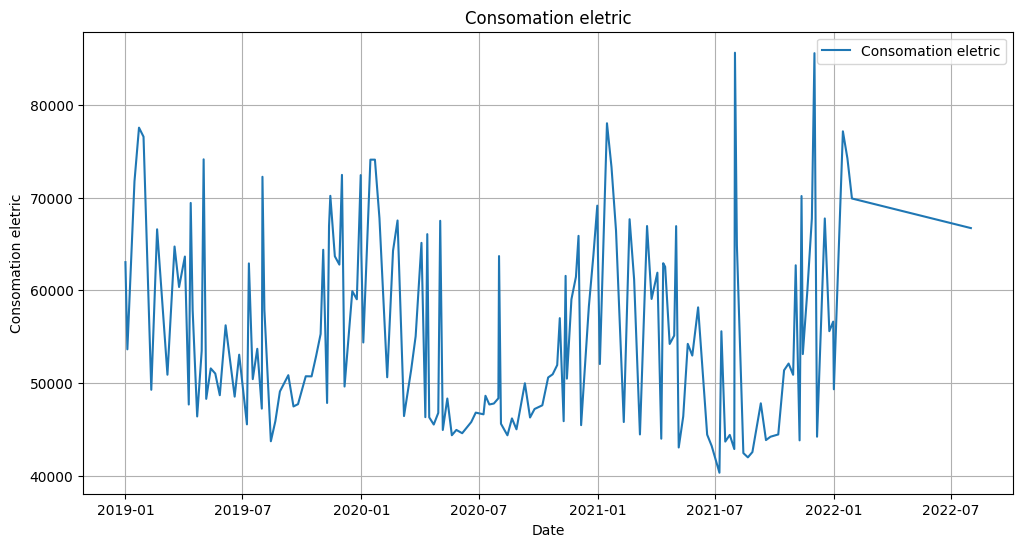

In [8]:
# Data Visualization
plt.figure(figsize=(12, 6))
plt.plot(df['date '], df['Consomation eletric'], label='Consomation eletric')
plt.title('Consomation eletric')
plt.xlabel('Date')
plt.ylabel('Consomation eletric')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Data Preprocessing
data = df['Consomation eletric'].values
data_normalized = (data - np.min(data)) / (np.max(data) - np.min(data))
sequence_length = 5

X, y = [], []
for i in range(len(data_normalized) - sequence_length):
    X.append(data_normalized[i:i+sequence_length])
    y.append(data_normalized[i+sequence_length])

X = np.array(X)
y = np.array(y)

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Reshape data for RNN input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the RNN Model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/50
4/4 [==============================] - 1s 4ms/step - loss: 0.1348
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0708
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0713
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0556
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0477
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0471
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0451
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0440
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 0.0446
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0436
Epoch 13/50
4/4 [==============================] - 0s 6ms/step - loss: 0.

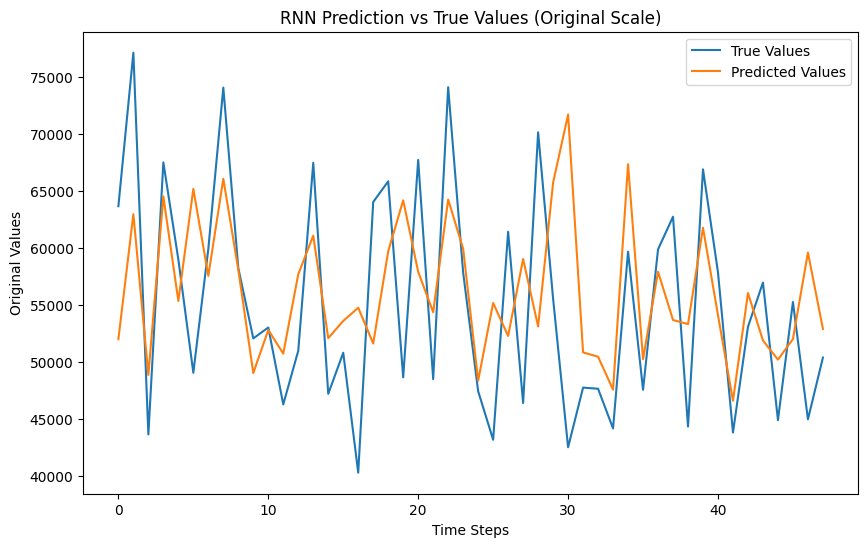

In [13]:
# Revenir aux valeurs d'origine après la normalisation
y_test_original = (y_test * (np.max(data) - np.min(data))) + np.min(data)
y_pred_original = (y_pred * (np.max(data) - np.min(data))) + np.min(data)

# Plot the results with original values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='True Values')
plt.plot(y_pred_original, label='Predicted Values')
plt.title('RNN Prediction vs True Values (Original Scale)')
plt.xlabel('Time Steps')
plt.ylabel('Original Values')
plt.legend()
plt.show()

**Conclusion :**


> Le notebook présente les étapes impliquées dans l'entraînement d'un RNN pour la prédiction de séries temporelles en utilisant TensorFlow. Ajustez les hyperparamètres et expérimentez avec différentes architectures pour optimiser le modèle selon votre ensemble de données spécifique.



